# Process a full dataset (all channels)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

import pylars

from pylars.processing.rawprocessor import simple_processor

from pylars.processing.waveforms import waveform_processing
from pylars.processing.pulses import pulse_processing

from pylars.plotting.plotwaveforms import *
from pylars.plotting.plotprocessed import *

In [3]:
process = simple_processor(sigma_level=5, baseline_samples=50)
data_path = '/disk/gfs_atp/xenoscope/SiPMs/char_campaign/raw_data/run6/room_temp_21072022/LED_ON_300K_51_0V/Module0/LED_ON_300K_51_0V_Module_0_0.root'
process.load_raw_data(data_path, V = 49, T = 300, module = 0)

### Processing:

In [4]:
results = process.process_all_channels()

Processing module 0 channel wf6: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 12690.53it/s]


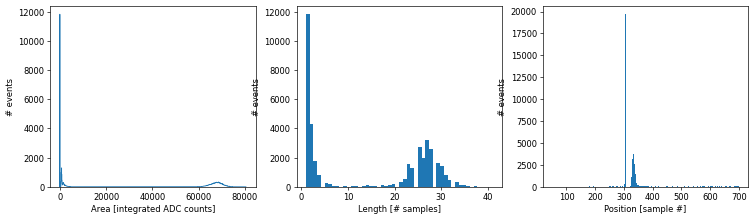

In [5]:
fig, axs = plt.subplots(1,3, figsize =(15,4), dpi = 60)
plot_3hists(results[results['channel']=='wf6'], axs = axs)
plt.show()

In [6]:
cut_mask = ((results['position'] > 300) &
            (results['position'] < 380))

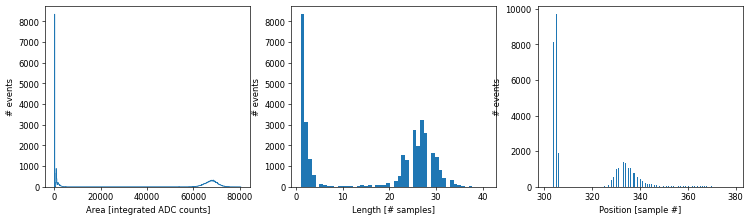

In [7]:
fig, axs = plt.subplots(1,3, figsize =(15,4), dpi = 60)
plot_3hists(results[cut_mask & (results['channel']=='wf6')], axs = axs)
plt.show()

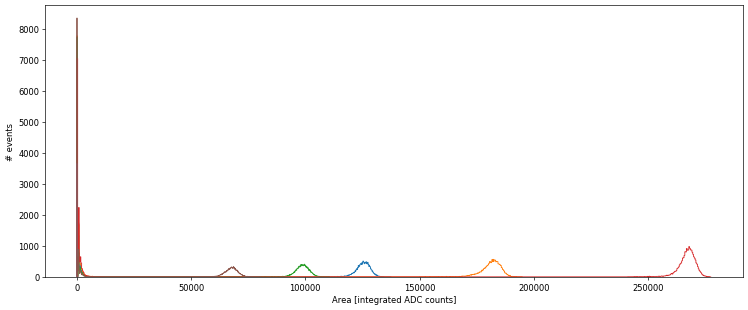

In [8]:
fig, ax = plt.subplots(1,1, figsize = (15,6), dpi = 60)
for _ch in process.raw_data.channels:
    ax = plot_hist_area(results[cut_mask & (results['channel']==_ch)], ax = ax)
plt.show()